<a href="https://www.analytiksinc.com">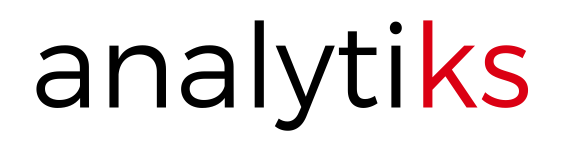</a>
<p style="text-align: right;"> © 2018. Analytiks Inc. </p>

# EXERCISE: ENSEMBLE MODEL

## Import Libraries

### Standard Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Additional Libraries

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline


#Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Classification Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#Ensemble Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

#Classification Metrics
from sklearn.metrics import accuracy_score



/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
from sklearn.exceptions import DataConversionWarning

import warnings
warnings.filterwarnings("ignore", category=DataConversionWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 

## Load and Explore the Dataset

Credit Scoring
<br>
*filename: crx_proc.csv*

Load the Dataset

In [4]:
df = pd.read_csv("crx_proc.csv")

View the Dataset

In [5]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


Check the number of observations and features

In [6]:
df.shape

(690, 16)

Check Dtypes and Null Values


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
A1        678 non-null object
A2        678 non-null float64
A3        690 non-null float64
A4        684 non-null object
A5        684 non-null object
A6        681 non-null object
A7        681 non-null object
A8        690 non-null float64
A9        690 non-null object
A10       690 non-null object
A11       690 non-null int64
A12       690 non-null object
A13       690 non-null object
A14       677 non-null float64
A15       690 non-null int64
Target    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.3+ KB


## Preprocessing

### Remove Null Values

In [8]:
df_no_null = df.dropna()

Check Number of Remaining Samples

In [9]:
df_no_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
A1        653 non-null object
A2        653 non-null float64
A3        653 non-null float64
A4        653 non-null object
A5        653 non-null object
A6        653 non-null object
A7        653 non-null object
A8        653 non-null float64
A9        653 non-null object
A10       653 non-null object
A11       653 non-null int64
A12       653 non-null object
A13       653 non-null object
A14       653 non-null float64
A15       653 non-null int64
Target    653 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 86.7+ KB


### Split Features and Target

In [10]:
X = df_no_null.drop(columns={'Target'}, axis = 1)
y = df_no_null["Target"]

### Convert Categorical Data to Numerical

In [11]:
df_cat = X.select_dtypes(include=['object'])

In [12]:
df_cat.head()

,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,b,u,g,w,v,t,t,f,g
1,a,u,g,q,h,t,t,f,g
2,a,u,g,q,h,t,f,f,g
3,b,u,g,w,v,t,t,t,g
4,b,u,g,w,v,t,f,f,s


In [13]:
for cat_col in df_cat.columns:
    print (df[cat_col].value_counts())
    print ("\n---------")

b    468
a    210
Name: A1, dtype: int64

---------
u    519
y    163
l      2
Name: A4, dtype: int64

---------
g     519
p     163
gg      2
Name: A5, dtype: int64

---------
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
r       3
Name: A6, dtype: int64

---------
v     399
h     138
bb     59
ff     57
z       8
j       8
dd      6
n       4
o       2
Name: A7, dtype: int64

---------
t    361
f    329
Name: A9, dtype: int64

---------
f    395
t    295
Name: A10, dtype: int64

---------
f    374
t    316
Name: A12, dtype: int64

---------
g    625
s     57
p      8
Name: A13, dtype: int64

---------


In [14]:
#convert categorical variable into dummy
df_converted = pd.get_dummies(df_cat)

In [15]:
df_converted.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,0
2,1,0,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,1,0,0
3,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1


In [16]:
df2 = pd.concat([X, df_converted], axis =1)

In [17]:
df2.drop(columns=df_cat, inplace = True )

In [18]:
df2.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,0,0,1,0,1,1,0,1,0,0
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,0,0,1,0,1,1,0,1,0,0
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,0,0,1,1,0,1,0,1,0,0
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,0,0,1,1,0,1,0,0,0,1


In [19]:
df2['Target_num'] = 1       
df2.loc[(y == '-' ), 'Target_num'] = 0     
df2.loc[(y == '+' ), 'Target_num'] = 1

In [20]:
df2.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,Target_num
0,30.83,0.000,1.25,1,202.0,0,0,1,0,1,...,0,1,0,1,1,0,1,0,0,1
1,58.67,4.460,3.04,6,43.0,560,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
2,24.50,0.500,1.50,0,280.0,824,1,0,0,1,...,0,1,1,0,1,0,1,0,0,1
3,27.83,1.540,3.75,5,100.0,3,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
4,20.17,5.625,1.71,0,120.0,0,0,1,0,1,...,0,1,1,0,1,0,0,0,1,1


### Generate the training and validation set with the following conditions
* Use the "train_test_split" function with these parameters:
    * test_size = 0.30
    * random_state = 123

* Use these variable names:
    * X_train
    * y_train
    * X_val
    * y_val

In [21]:
# X_train,X_val,y_train,y_val = train_test_split(X,y,test_size= 0.30, random_state = 123)

#split the dataset to training and testing dataset
df_train, df_test = train_test_split(df2, test_size = 0.30, random_state = 123)

#copy the dataset to preserve the orginal class of the test dataset
df_predicted_set = df_test.copy()
df_predicted_set.head()

,A2,A3,A8,A11,A14,A15,A1_a,A1_b,A4_l,A4_u,...,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s,Target_num
399,31.00,2.085,0.085,0,300.0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0
288,18.83,0.415,0.165,1,200.0,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,0
43,39.58,13.915,8.625,6,70.0,0,0,1,0,1,...,0,1,0,1,0,1,1,0,0,1
234,58.42,21.000,10.000,13,0.0,6700,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
373,26.25,1.540,0.125,0,100.0,0,0,1,0,1,...,1,0,1,0,1,0,1,0,0,0


In [22]:
#separate the class column of train and test dataset
y_train = df_train["Target_num"]
y_val = df_test["Target_num"]

del df_test["Target_num"]
del df_train["Target_num"]
X_train = df_train
X_val = df_test

Verify the shapes of each variable to make sure it was properly assigned

In [23]:
print "X_train", X_train.shape
print "X_val", X_val.shape
print "y_train", y_train.shape
print "y_val", y_val.shape

X_train (457, 46)
X_val (196, 46)
y_train (457,)
y_val (196,)


Check value counts of target variable for both training and validation set

In [24]:
print "y_train"
print y_train.value_counts()
print "y_val"
print y_val.value_counts()

y_train
0    250
1    207
Name: Target_num, dtype: int64
y_val
0    107
1     89
Name: Target_num, dtype: int64


## Classification Algorithms

Build multiple classifiers

* Use the make_pipeline function
* Every algorithm should go through the pipeline (MinMaxScaler, Classifier) 
* For each classifier, get the accuracy score on the validation test set

### Logistic Regression

#### Build a Logistic Regression Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, LogisticRegression)
* Get accuracy score for the validation set

In [25]:
scaler = MinMaxScaler()
reg = LogisticRegression(random_state = 123)

model = make_pipeline(scaler, reg)

In [26]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=123, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [27]:
score = model.score(X_val, y_val)
print("Accuracy %.3f" % score)

Accuracy 0.888


### Decision Tree

#### Build a Decision Tree Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, DecisionTree)
* Get accuracy score for the validation set

In [28]:
scaler = MinMaxScaler()
dec = DecisionTreeClassifier(random_state = 123)

model = make_pipeline(scaler, dec)

In [29]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best'))])

In [30]:
score = model.score(X_val, y_val)
print("Accuracy %.3f" % score)

Accuracy 0.842


## Ensemble Models

### Random Forest

#### Build a Random Forest Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, RandomForestClassifier)
* Get accuracy score for the validation set

In [31]:
scaler = MinMaxScaler()
rand = RandomForestClassifier(random_state = 123)

model = make_pipeline(scaler, rand)

In [32]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_spl...timators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False))])

In [33]:
score = model.score(X_val, y_val)
print("Accuracy %.3f" % score)

Accuracy 0.857


#### Get Feature Importance from the RandomForest Classifier
Display the Top 5 Features

In [34]:
importances = rand.feature_importances_
std = np.std([tree.feature_importances_ for tree in rand.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
importances

array([6.20864527e-02, 6.29813961e-02, 7.94856311e-02, 3.84943902e-02,
       6.85434532e-02, 3.61253108e-02, 6.05698325e-03, 5.50397100e-03,
       1.77661712e-03, 1.00050380e-02, 7.65166536e-03, 4.59991922e-03,
       4.12823182e-03, 1.12977646e-02, 2.12665993e-03, 1.17979425e-02,
       5.38491828e-03, 7.53051755e-05, 9.43369901e-04, 4.11530381e-03,
       6.92063393e-03, 6.49150537e-04, 8.23412968e-03, 3.51408976e-03,
       3.92785102e-03, 0.00000000e+00, 1.29411208e-02, 8.84146801e-03,
       7.36585343e-03, 0.00000000e+00, 2.79902732e-03, 7.55018192e-03,
       3.51608255e-03, 2.47142328e-03, 0.00000000e+00, 8.71400098e-03,
       2.78458955e-03, 1.53408279e-01, 2.49266334e-01, 5.79547218e-02,
       7.26840501e-03, 7.36253650e-03, 9.42266171e-03, 7.25738818e-03,
       0.00000000e+00, 4.64974761e-03])

In [35]:
print("Feature ranking:")

for f in range(0,5):
    print("%d. feature %d - %s (%f)"   % (f + 1, indices[f], df_train.columns[f],importances[indices[f]]))

Feature ranking:
1. feature 38 - A2 (0.249266)
2. feature 37 - A3 (0.153408)
3. feature 2 - A8 (0.079486)
4. feature 4 - A11 (0.068543)
5. feature 1 - A14 (0.062981)


#### Perform Hyper Parameter Optimization on the Random Forest Classifier
* Choose either Grid Search or Random Search with the following parameters:
    * cv=5
    * refit=True
* Optimize the following parameters:
    * max_depth
    * max_features
    * min_samples_split
    * min_samples_leaf
    * bootstrap
    * criterion
* Get Accuracy Score for validation set

Build the Model

In [36]:
# Grid Search
# use a full grid over all parameters
param_grid = {"max_depth": [3,10, 20],
              "max_features": [1, 10, 12],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 2],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [37]:
scaler = MinMaxScaler()
clf = RandomForestClassifier(random_state=123,n_estimators=20)

grid_search = GridSearchCV(clf, 
                           param_grid=param_grid, 
                           cv=5)

model = make_pipeline(scaler, grid_search)

In [38]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('gridsearchcv', GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
        ...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))])

In [39]:
score = model.score(X_val, y_val)
print("Accuracy %.3f" % score)

Accuracy 0.883


Print the Best Score

In [40]:
gs = model.steps[1][1]

print "Best score:"
print gs.best_score_

Best score:
0.8818380743982495


Print the Best Parameters

In [41]:
print "Best parameters:"
print gs.best_params_

Best parameters:
{'bootstrap': True, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'gini', 'max_features': 10, 'max_depth': 10}


### GBM

#### Build a GBM Classifier
* Use default parameters with random_State=123
* Use a pipeline (MinMaxScaler, GBM)
* Get accuracy score for the validation set

In [42]:
scaler = MinMaxScaler()
gbm = GradientBoostingClassifier(random_state=123)

model = make_pipeline(scaler, gbm)

In [43]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              mi...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))])

In [44]:
score = model.score(X_val, y_val)
print("Accuracy %.3f" % score)

Accuracy 0.888


### VOTING

#### Build a Voting Classifier
* Use the following estimators:
    * Logistic Regression
    * Random Forest
    * GBM
* Choose either 'hard' or 'soft' voting
* Use a pipeline (MinMaxScaler, Voting)
* Get accuracy score for the validation set

In [45]:
clf1 = LogisticRegression(random_state=123)
clf2 = RandomForestClassifier(random_state=123)
clf3 = GradientBoostingClassifier(random_state=123)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gbm', clf3)], voting='hard')

model = make_pipeline(scaler, eclf)

In [46]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('votingclassifier', VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l...      warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None))])

In [47]:
score = model.score(X_val, y_val)
print("Accuracy %.3f" % score)

Accuracy 0.878


/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
